# Background

In this notebook I will be exploring the Iris dataset. This dataset is one of the most well known datasets that is used for pattern recognition. This dataset is available from the UCI Machine Learning Repository which has many well known ans widely used collection of datasets for use in machine Learning. The dataset was created by British statistician and biologist Ronald Fisher. In 1936 Fisher introduced the Iris flower data set as an example of discriminant analysis which he proposed as a method to predict qualitative values. He used it to distinguish the different species of Iris flowers from each other using the combination of the four measurement variables in the data set.
![alt text](https://www.bing.com/search?q=ronald+fisher&filters=dtbk:%22MCFvdmVydmlldyFvdmVydmlldyExMDM0MzhmYi00OGMxLWM2MTctN2ZiYS05MmM2MzdhMmUxZDE%3d%22+sid:%22103438fb-48c1-c617-7fba-92c637a2e1d1%22+tphint:%22f%22&FORM=DEPNAV) "Ronald fisher")

While Fisher used the Iris data set as an example to demonstrate statistical methods of classification, the Iris data itself was actually collected by Edgar Anderson, an American botanist and geneticist. Fishers's Iris data set is therefore often known as Anderson's Iris data set. Anderson was  particularly interested in the variation in plant species or a group of species, and in evolution in general. Anderson carefully examined the individual characters of the iris plants that were growing in different conditions. He used scatter diagrams and ideographs - simplified diagrams which he developed himself - so that he could visualise and compare the data more easily. These methods helped him to come to conclusions about the data.





## Project Outline
The goal of the project is to conduct a comprehensive analysis on the Iris Flower dataset. Each variable within the dataset will be systematically classified in this notebook. For numerical variables, appropriate summary statistics such as mean, median, and standard deviation will be calculated. Categorical variables will be summarized using counts and percentages. Suitable plots for visual representation of these variables must be choosem. Some of these plots include histograms, box plots, and scatter plots. The project aims to provide a well-documented and insightful examination of the dataset, highlighting key patterns and characteristics.

# Importing of Modules
Here we import packages we rely on to aid anlaysis and visualisation of the data:

1. Pandas (a Python library used for working with datasets and is used to analyse, explore and manipulate data)
2. Numpy (a Python library used for working with arrays)
3. Matplotlib (a Python library used for plotting data and for visualisation)
4. Tabulate (a Python package used to print tabular data in nicely formatted tables)
5. Seaborn (a Python library used for data visualisation - provides informative statistical graphics)
6. Sys (a Python module that provides functions and variables that are used to manipulate parts of the Python runtime environment)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns
import sys
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
from sklearn.linear_model import LinearRegression


csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris_data =  pd.read_csv(csv_url, names = col_names)

print(f"{iris_data.info}")






<bound method DataFrame.info of      Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


The Iris dataset contains three classes with a sample of three 3 classes, with each class referencing a type of iris plant. There are 50 instances of each class, with 150 instances in total.  these classes are as follows 

1. iris-setosa 
2. iris-versicolour
3. iris-virginica 



the variables for each column are as follows 

1. sepal length (cm) - float64
2. sepal width (cm) - float64
3. petal length (cm) - float64
4. petal width (cm) - float64
5. Class- object

'object' is the pandas equivalent to python's 'string' datatype. It is the most general datatype and can contain both numbers (as characters) and strings (text)
'float64' is a pandas datatype for numeric data and it is automatically assigned to columns that contain numeric characters with decimal point and/or NaN values

# Statistical categories

In [3]:
print(iris_data.columns)
print(f"\n{iris_data.head(5)}")
print(f"{iris_data.tail(5)}")
print(f"{iris_data.sample(5)}")




Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
     Sepal_Length  Sepal_Width  Petal_Length  

The above output shows the first five columns along with the last five columns along with a random sample to show some of the variables. I will now test the dataset to find if there is any null values in this dataset using the isnull function.I will also test for duplicated values in the dataset.  

In [4]:
iris_data.isnull()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

As we can see there is no missing values in this dataset and no duplicated values as can be seen from the bool object. 

# Summary of Each Variable


A table of statistics for each variable can be seen below:

In [6]:
print("A table of statistics for each variable can be seen below.")
print("The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5")
print("display statistics such as mean, min and max for each of the 4 variables when grouped together by class.\n")

print("Table 1 - Iris Dataset Statistics")
iris_source = iris_data.agg({'Sepal_Length': ['mean', 'min', 'max', 'std'],
                           'Sepal_Width': ['mean', 'min', 'max', 'std'],
                           'Petal_Length': ['mean', 'min', 'max', 'std'],
                           'Petal_Width': ['mean', 'min', 'max', 'std']})
print(tabulate(iris_source, headers = ["Stat", "Sepal_Length (cm)", "Sepal_Width (cm)", "Petal_Length (cm)", "Petal_Width (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Length Statistics
print("Table 2 - Iris Dataset Sepal Length Statistics")
table_of_data = iris_data.groupby('Class').agg({'Sepal_Length': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Sepal Width Statistics
print("Table 3 - Iris Dataset Sepal Width Statistics")
table_of_data = iris_data.groupby('Class').agg({'Sepal_Width': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Length Statistics
print("Table 4 - Iris Dataset Petal Length Statistics")
table_of_data = iris_data.groupby('Class').agg({'Petal_Length': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print('\n')

# Petal Width Statistics
print("Table 5 - Iris Dataset Petal Width Statistics")
table_of_data = iris_data.groupby('Class').agg({'Petal_Width': ['mean', 'min', 'max']})
table_of_data.reset_index(inplace=False)
print(tabulate(table_of_data, headers = ["Class", "Mean (cm)", "Min (cm)", "Max (cm)"], tablefmt='grid', stralign='center'))
print("\n")



A table of statistics for each variable can be seen below.
The first table displays statistics of the data set as a whole, while Tables 2,3,4 and 5
display statistics such as mean, min and max for each of the 4 variables when grouped together by class.

Table 1 - Iris Dataset Statistics
+--------+---------------------+--------------------+---------------------+--------------------+
|  Stat  |   Sepal_Length (cm) |   Sepal_Width (cm) |   Petal_Length (cm) |   Petal_Width (cm) |
+========+=====================+====================+=====================+====================+
|  mean  |            5.84333  |           3.054    |             3.75867 |           1.19867  |
+--------+---------------------+--------------------+---------------------+--------------------+
|  min   |            4.3      |           2        |             1       |           0.1      |
+--------+---------------------+--------------------+---------------------+--------------------+
|  max   |            7.9      | 

# Information on the variables 
1.  sepal Length as we can see is the largest variable in this dataset it has a mean of 5.8 
2. Petal Width is the smallest variable in this dataset with a mean of 1.2 
3.  the largest of the sepal Widths is the iris setosa
4. Petal Length and Petal Width are both largest in the Iris virginica species, and smallest in the Iris setosa species.
5.  Petal Length is the variable with the widest spread of data, with a standard deviation of 1.7 and a range from a minimum of 1 to a maximum of 6.9.
6. Sepal Width then is the variable with the smallest spread of data, as all three species of Iris plant have similar sepal widths.


# Distribution of the Variables 
I Will begin looking on at the distribution of variables. I will start by using a histogram to  visualise the distribution of the variables in a dataset. In this project I will be looking at the four variables Petal Length, Petal Width, Sepal Length and Sepal Width - by Class. 

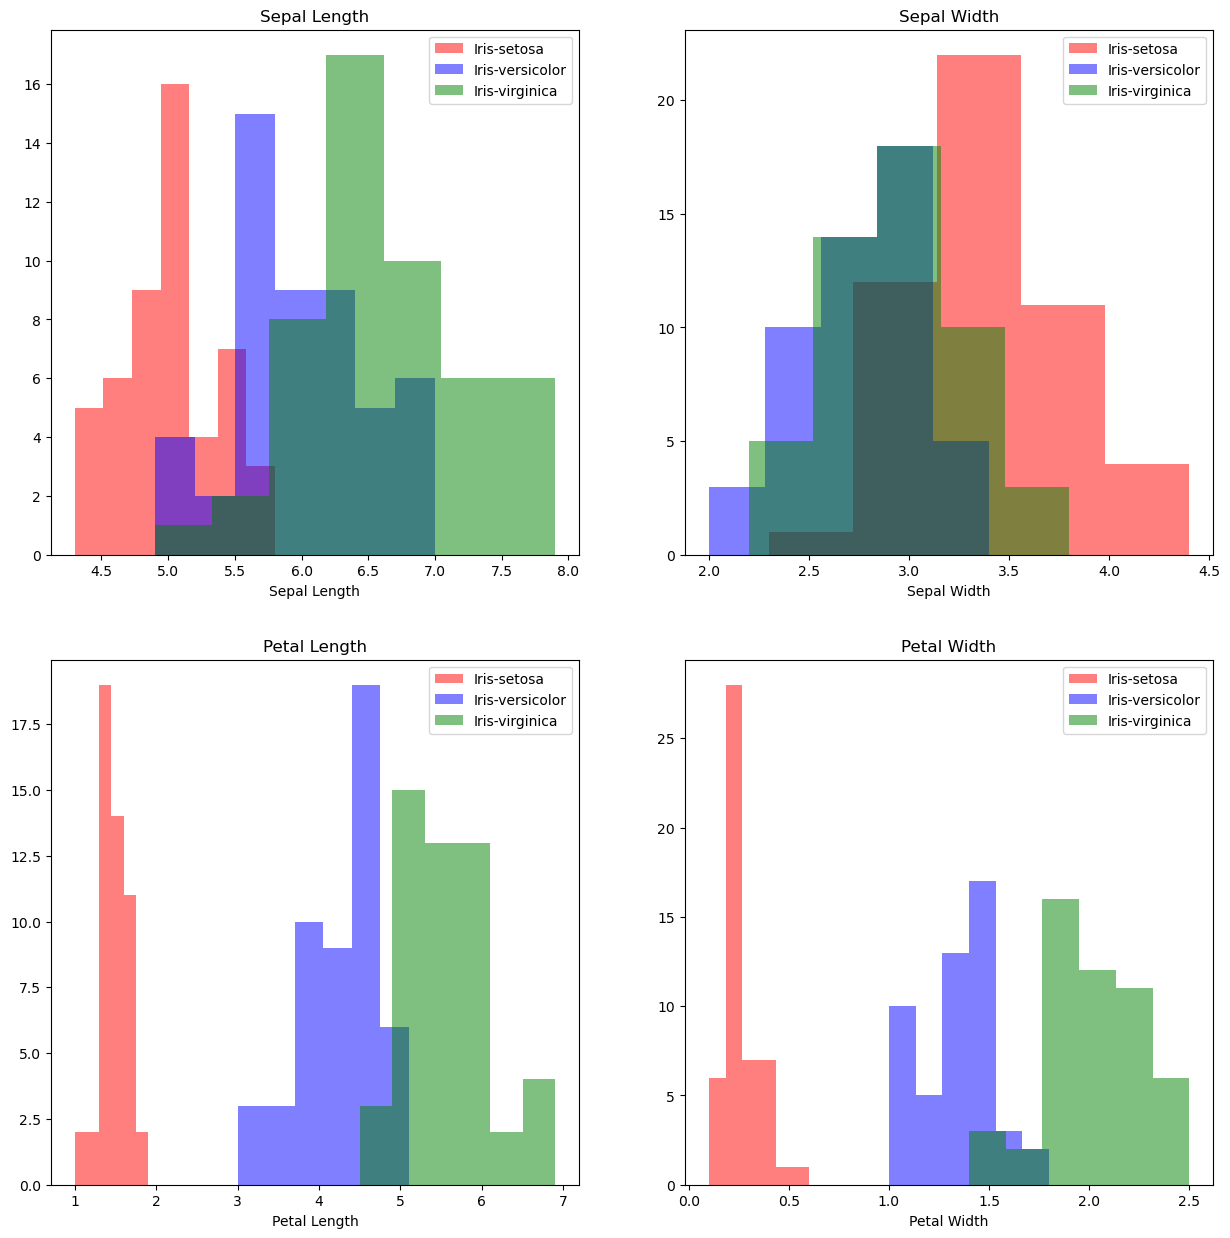

In [7]:
fig, axes = plt.subplots(2,2, figsize = (15,15))            
setosa = iris_data[iris_data.Class == "Iris-setosa"]                  
versicolor = iris_data[iris_data.Class == "Iris-versicolor"]
virginica = iris_data[iris_data.Class == "Iris-virginica"]

# sepal length histogram 
axes[0,0].set_title("Sepal Length")    
axes[0,0].set(xlabel='Sepal Length')
axes[0,0].hist(setosa['Sepal_Length'], bins=7, alpha=0.5, label="Iris-setosa", color='red')            
axes[0,0].hist(versicolor['Sepal_Length'], bins=7, alpha=0.5, label="Iris-versicolor", color='blue')  
axes[0,0].hist(virginica['Sepal_Length'], bins=7, alpha=0.5, label="Iris-virginica", color='green')    
axes[0,0].legend(loc='upper right')                         
    
# sepal width histogram 
axes[0,1].set_title("Sepal Width")    
axes[0,1].set(xlabel='Sepal Width')
axes[0,1].hist(setosa['Sepal_Width'], bins=5, alpha=0.5, label="Iris-setosa", color='red')
axes[0,1].hist(versicolor['Sepal_Width'], bins=5, alpha=0.5, label="Iris-versicolor", color='blue')
axes[0,1].hist(virginica['Sepal_Width'], bins=5, alpha=0.5, label="Iris-virginica", color='green')
axes[0,1].legend(loc='upper right');

# petal length histogram 
axes[1,0].set_title("Petal Length")
axes[1,0].set(xlabel='Petal Length')
axes[1,0].hist(setosa['Petal_Length'], bins=6, alpha=0.5, label="Iris-setosa", color='red')
axes[1,0].hist(versicolor['Petal_Length'], bins=6, alpha=0.5, label="Iris-versicolor", color='blue')
axes[1,0].hist(virginica['Petal_Length'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,0].legend(loc='upper right');

# petal width histogram 
axes[1,1].set_title("Petal Width")
axes[1,1].set(xlabel='Petal Width')
axes[1,1].hist(setosa['Petal_Width'], bins=6, alpha=0.5, label="Iris-setosa", color='red')
axes[1,1].hist(versicolor['Petal_Width'], bins=6, alpha=0.5, label="Iris-versicolor", color='blue')
axes[1,1].hist(virginica['Petal_Width'], bins=6, alpha=0.5, label="Iris-virginica", color='green')
axes[1,1].legend(loc='upper right');

By looking at the above histogram we can see that Sepal width is normally distributed. 

I am now going to plot the probability density function(PDF) of each variable. Probability Density Function is the function of probability defined for various distributions of variables. 

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a

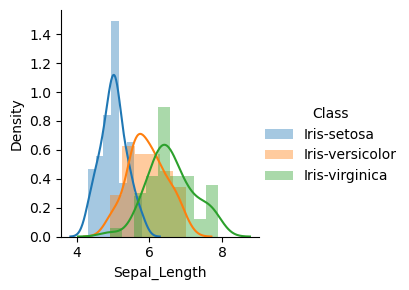

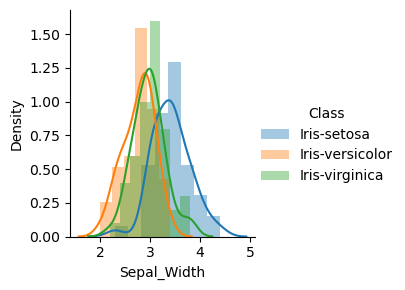

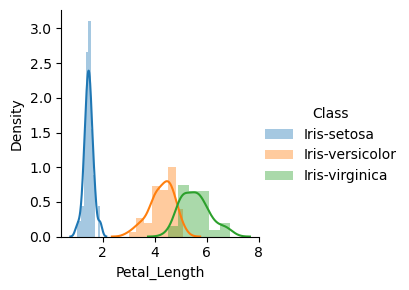

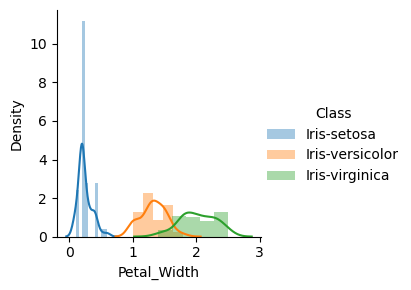

In [8]:
sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Sepal_Length") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Sepal_Width") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Petal_Length") \
.add_legend()

sns.FacetGrid(iris_data, hue="Class") \
.map(sns.distplot, "Petal_Width") \
.add_legend()
plt.show()

The first plot above shows that there is quite a lot of overlap between the sepal length class. plot 2 shows that there is a higher overlap on the sepal width class. However we can see from plot 3 and plot 4 that there is more seperation in petal length and and petal width class and that the setosa is seperated in these plots from versicolor and virginica. Plot 3 and 4 also shows that Petal Width and Petal Length has a good Classification feature. Where Sepal width and sepal length does not have much a Classification feature. 

# bar chart
Next I am going to look at using a bar chart to visualise the data. A bar chart plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.



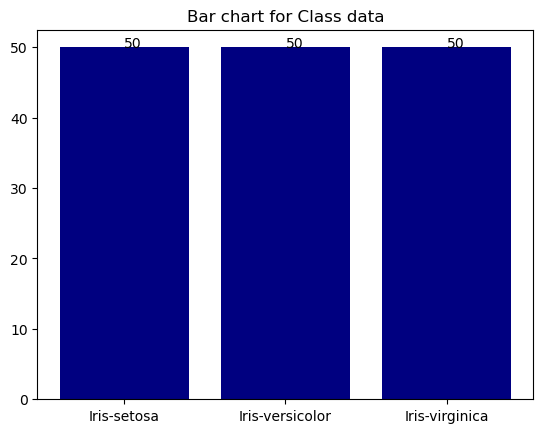

In [9]:
freq = iris_data['Class'].value_counts()
Class = freq.index
plt.bar(Class, freq, color='navy')
plt.title('Bar chart for Class data')
for i, f in enumerate(freq):
    plt.text(i, f,  str(f))
plt.show()


The above bar chart shows the breakdown setosa versicolor and virginica it shows that each class has got 50 variables each and is even in the dataset. 

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight


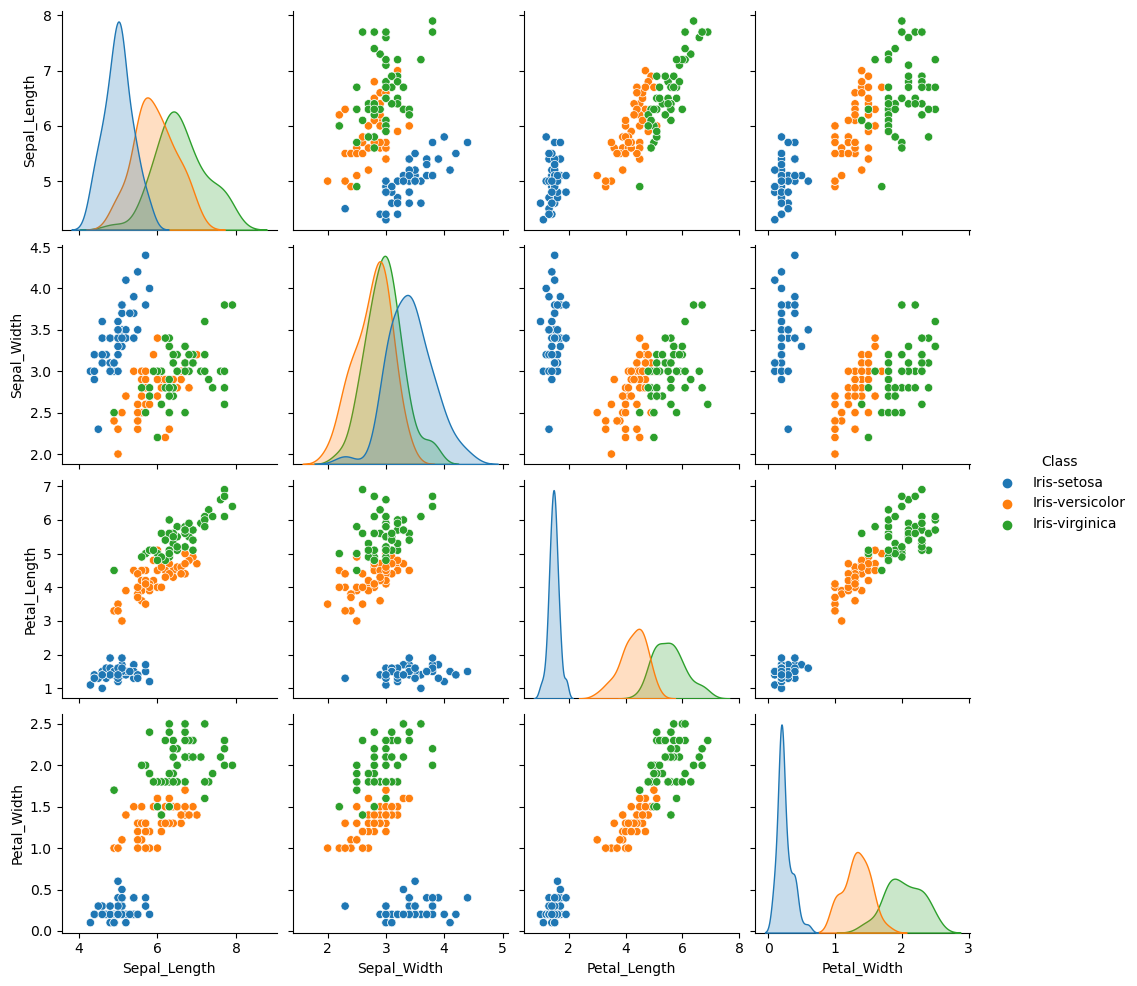

In [10]:
sns.pairplot(iris_data, hue='Class')

# piecharts 

A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice  is proportional to the quantity it represents.

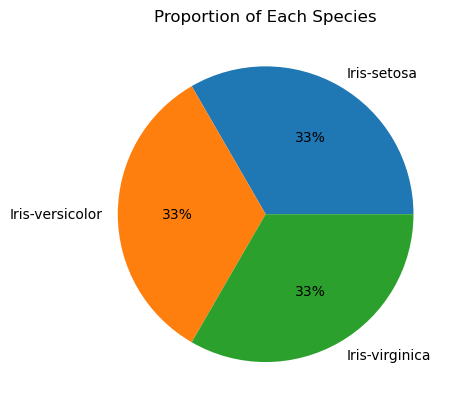

In [11]:
species_counts = iris_data['Class'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%.0f%%')
plt.title('Proportion of Each Species')
plt.show()

# Correlation



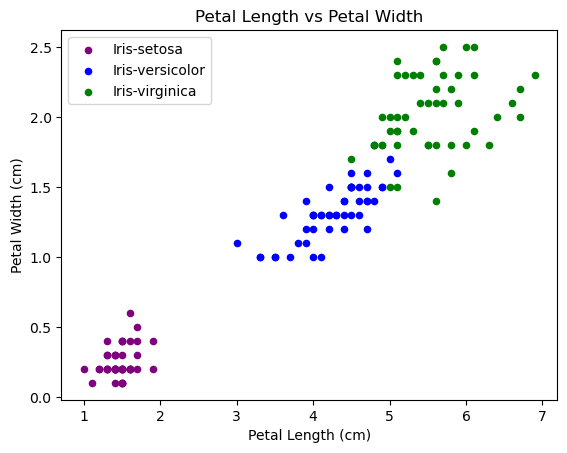

In [12]:
fig, ax = plt.subplots()
colors = {'Iris-setosa': 'purple', 'Iris-versicolor': 'blue' , 
            'Iris-virginica': 'green'}

grouped = iris_data.groupby('Class')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Petal_Length', y='Petal_Width', label=key, color=colors[key])

plt.title("Petal Length vs Petal Width")
plt.legend()
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

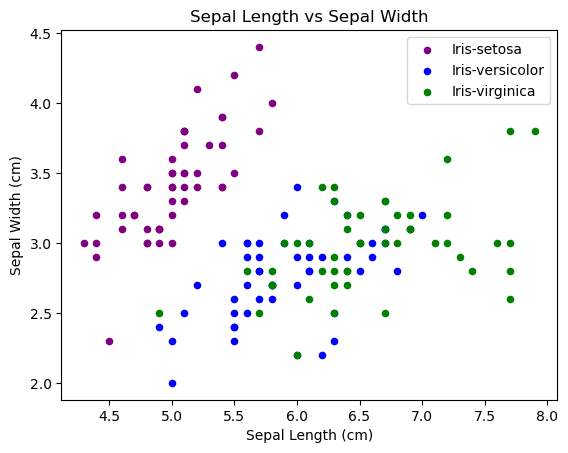

In [13]:
fig, ax = plt.subplots()
colors = {'Iris-setosa': 'purple', 'Iris-versicolor': 'blue' , 
            'Iris-virginica': 'green'}

grouped = iris_data.groupby('Class')
for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Sepal_Length', y='Sepal_Width', label=key, color=colors[key])

plt.title("Sepal Length vs Sepal Width")
plt.legend()
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

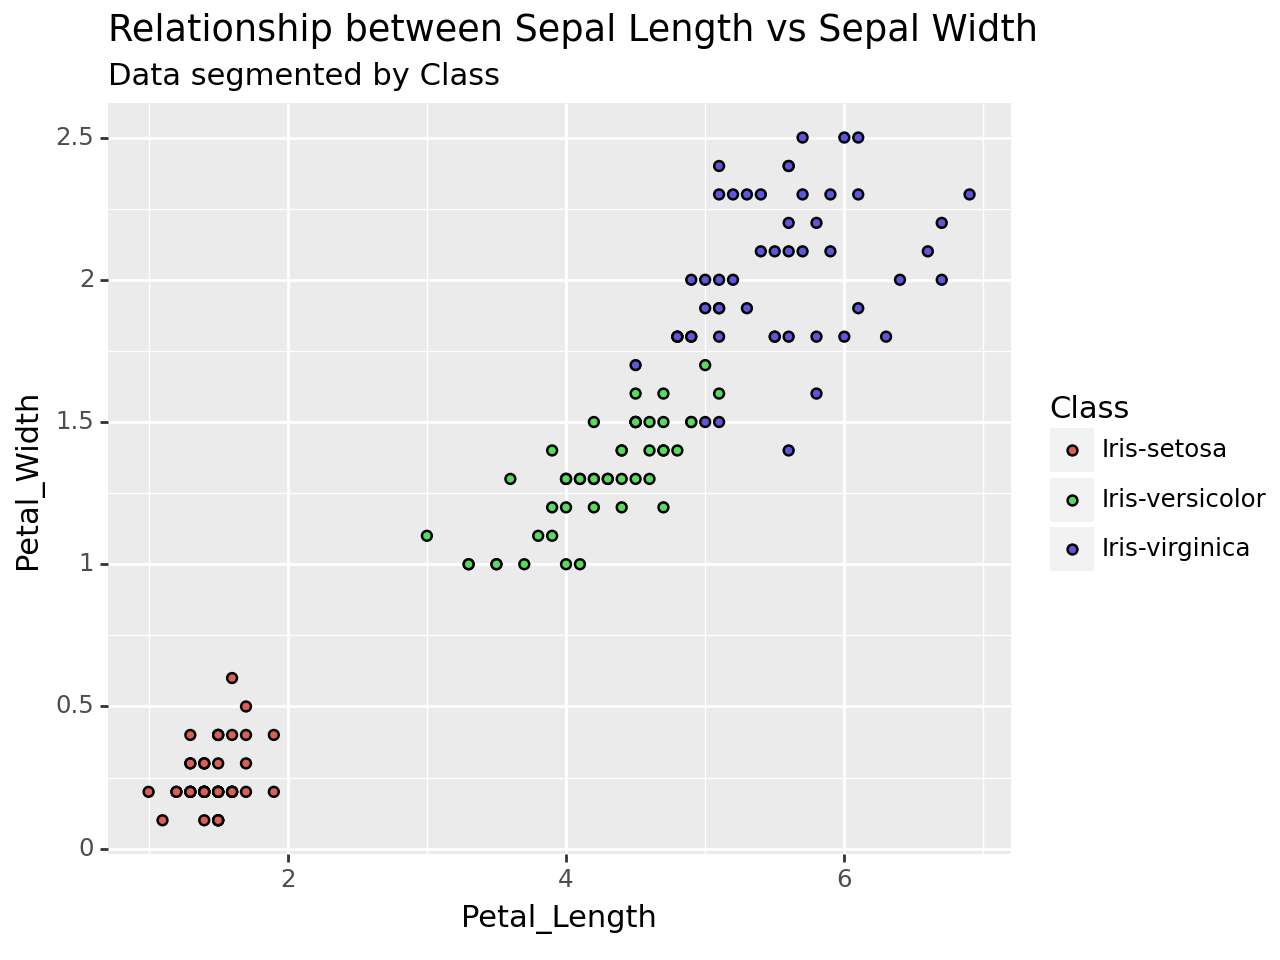

<Figure Size: (640 x 480)>

In [14]:
(ggplot(data = iris_data) + aes(x = "Petal_Length", y = "Petal_Width", fill="Class") + geom_point() + labs(title = "Relationship between Sepal Length vs Sepal Width",
subtitle ="Data segmented by Class"))

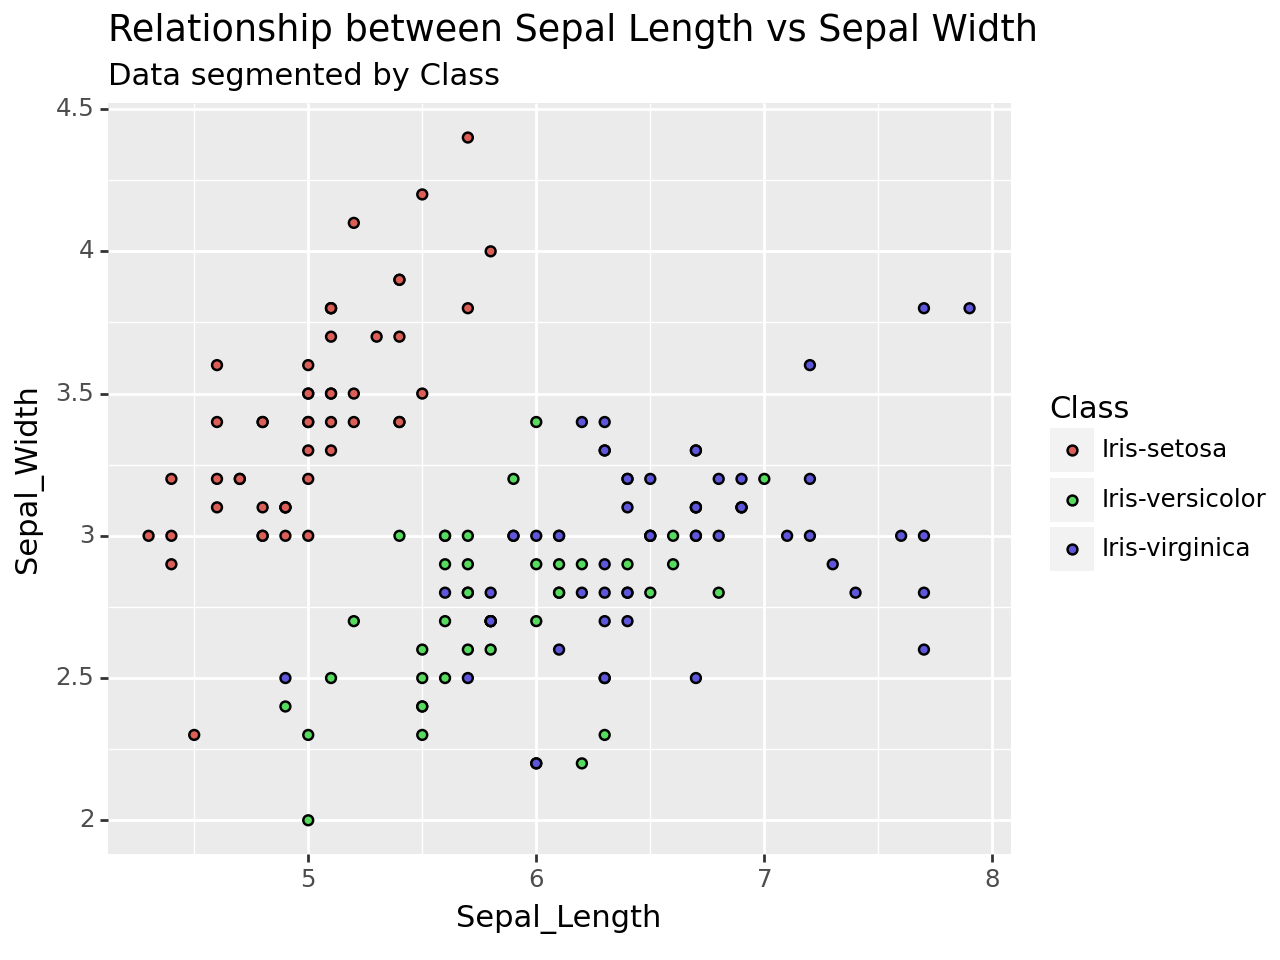

<Figure Size: (640 x 480)>

In [15]:
(ggplot(data = iris_data) + aes(x = "Sepal_Length", y = "Sepal_Width", fill="Class") + geom_point() + labs(title = "Relationship between Sepal Length vs Sepal Width",
subtitle ="Data segmented by Class"))

c:\Users\keith\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\keith\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\keith\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


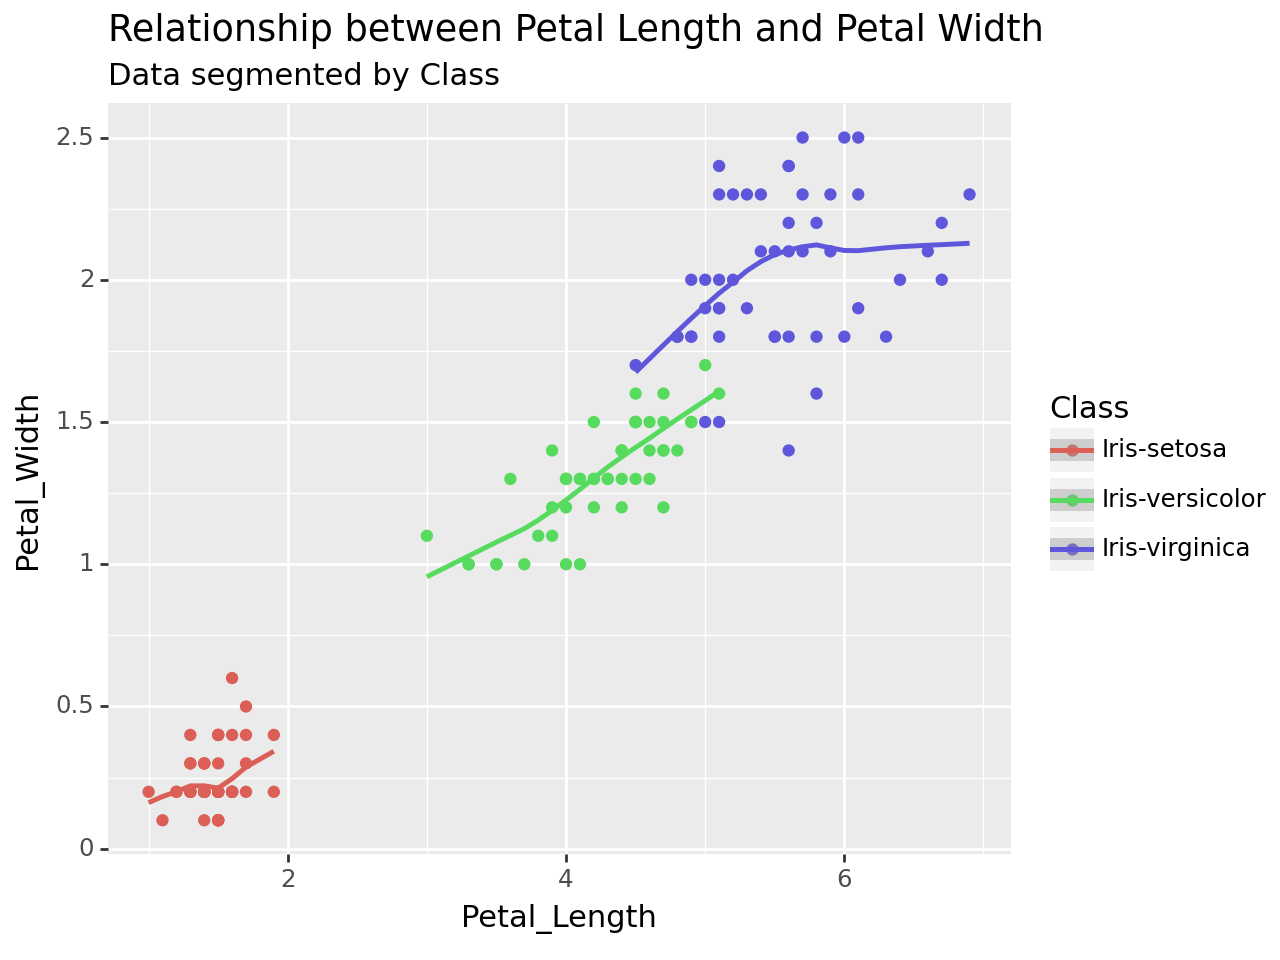

<Figure Size: (640 x 480)>

In [16]:
(ggplot(data = iris_data)+

geom_point(mapping = aes(x="Petal_Length", y = "Petal_Width", colour="Class"))+

geom_smooth(mapping = aes(x="Petal_Length", y = "Petal_Width", colour="Class"))+

labs(title = "Relationship between Petal Length and Petal Width",

subtitle ="Data segmented by Class"))

# boxplots 

A boxplot is used to see how the categorical feature Class is distributed with all other four input variables

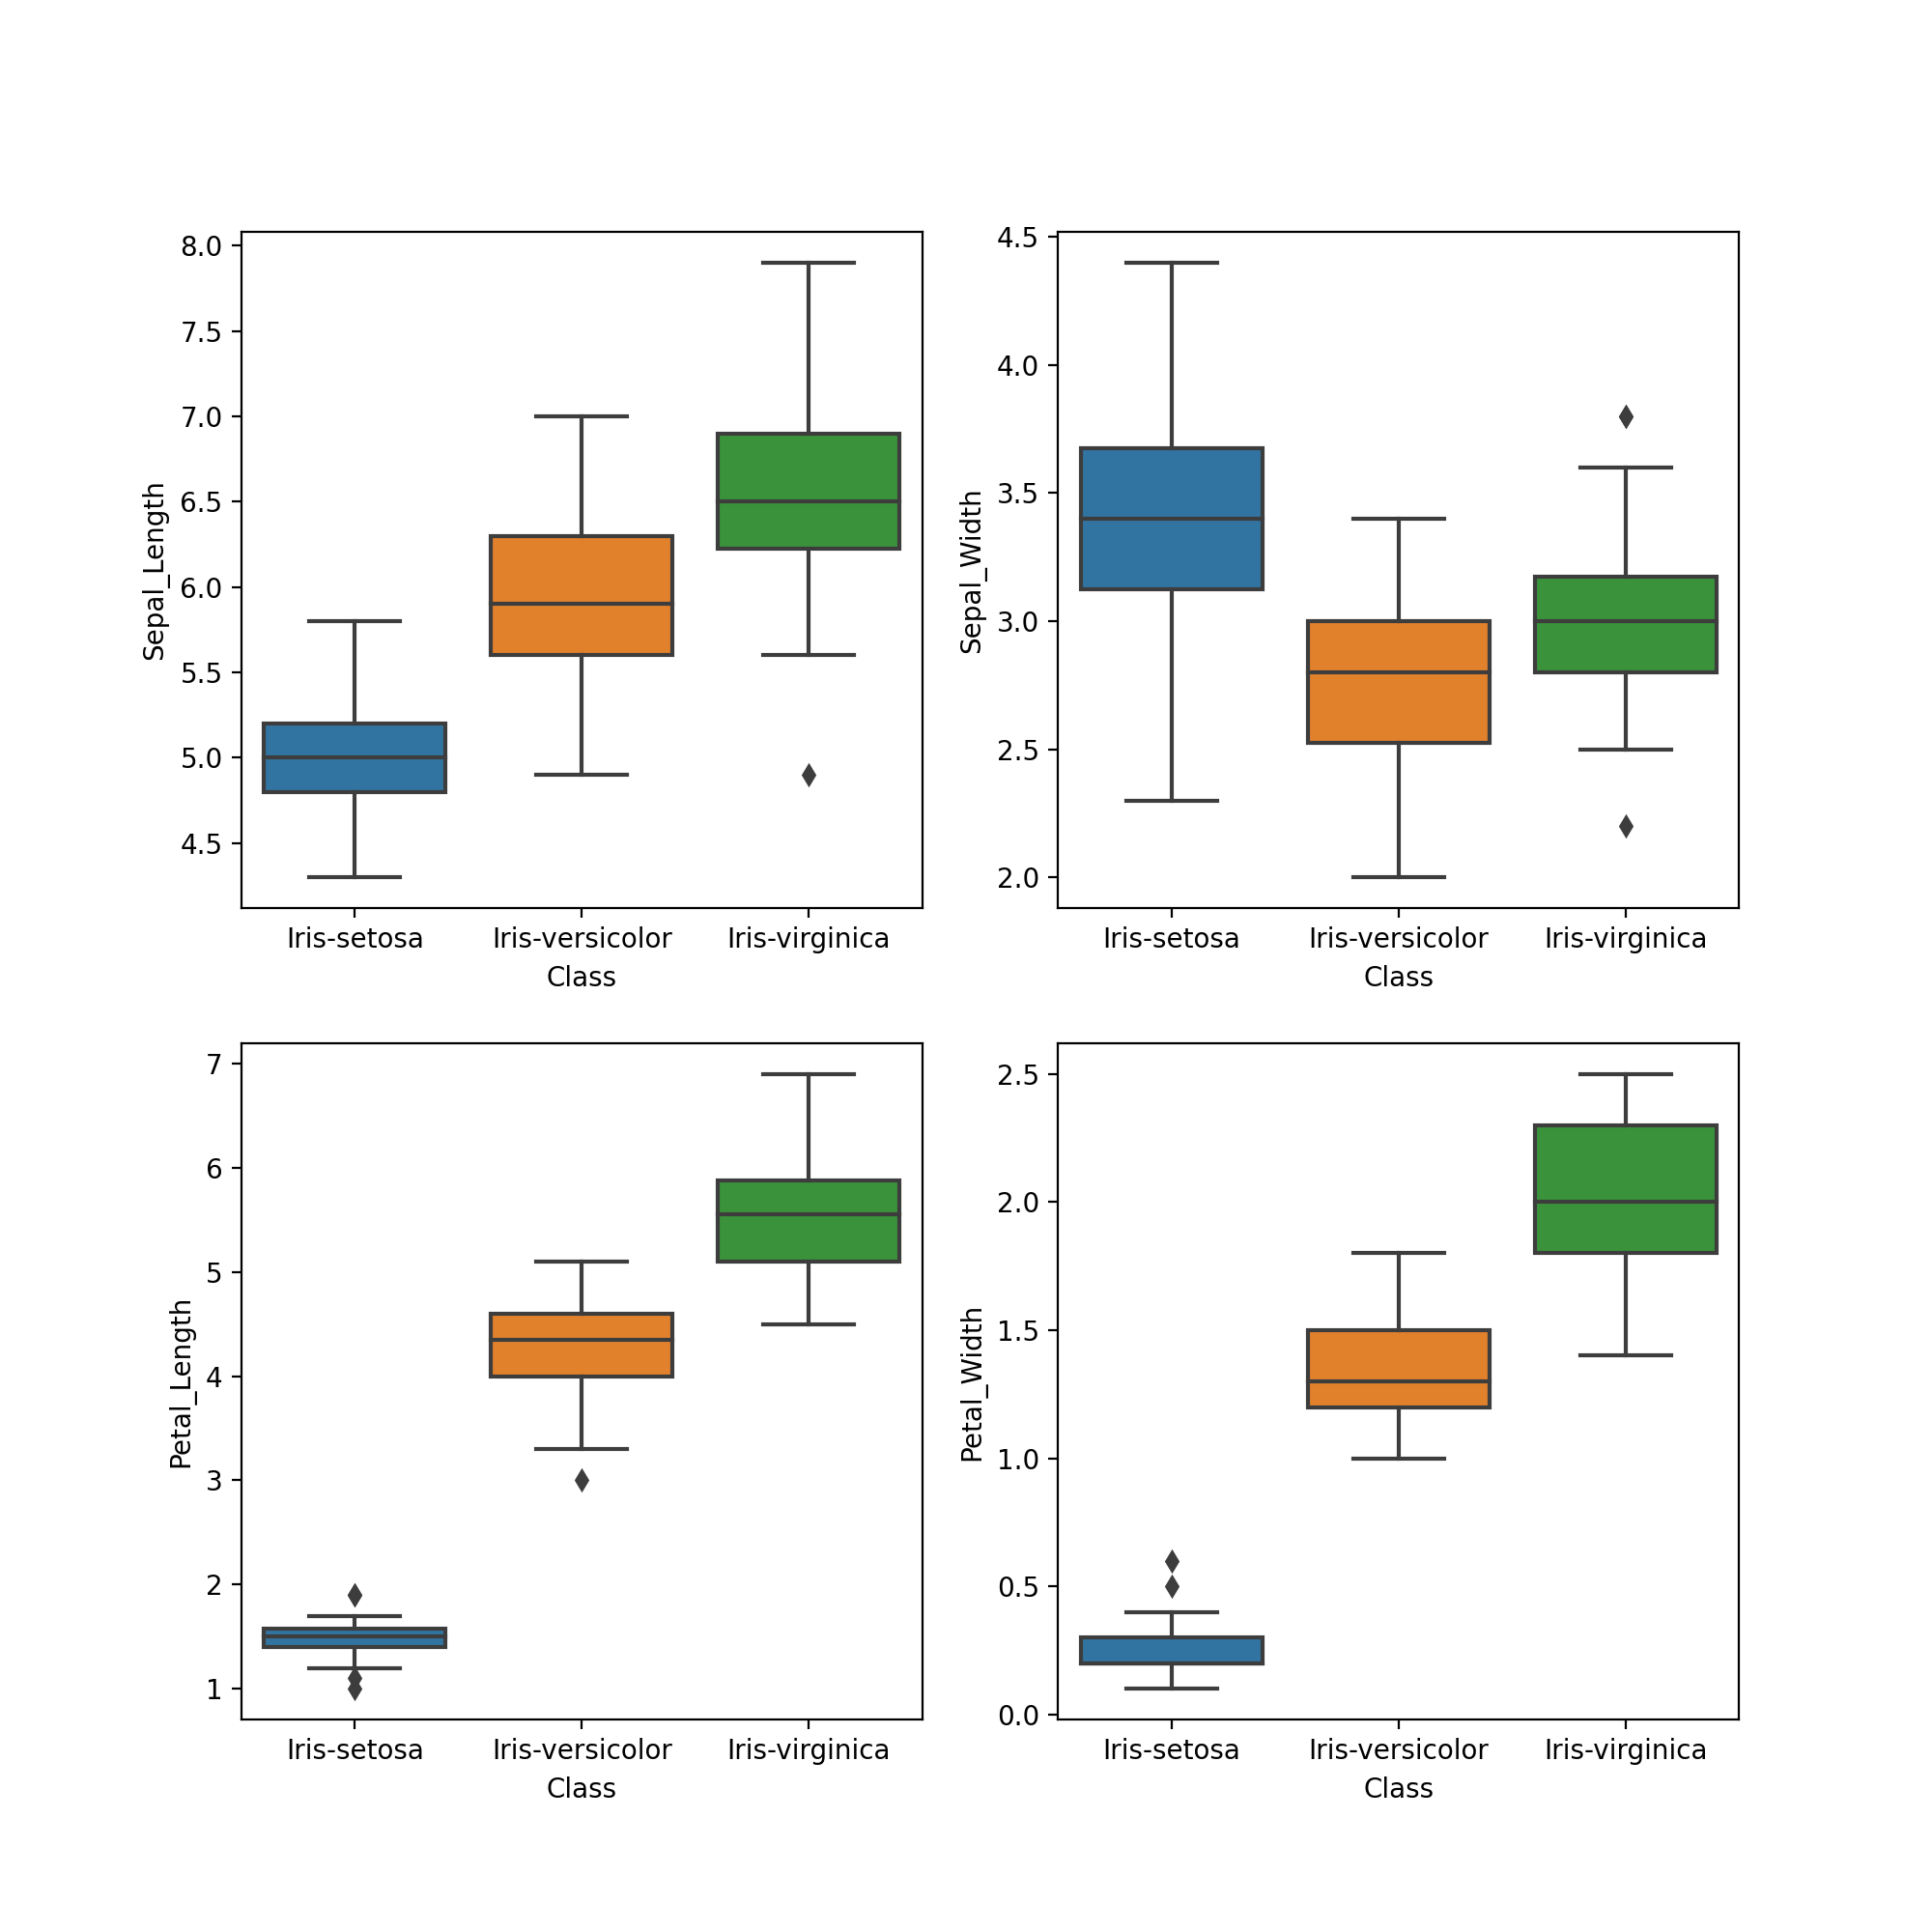

In [17]:
def graph(y):
    sns.boxplot(x="Class", y=y, data=iris_data)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Sepal_Length')
 
plt.subplot(222)
graph('Sepal_Width')
 
plt.subplot(223)
graph('Petal_Length')
 
plt.subplot(224)
graph('Petal_Width')
 
plt.show()

The box graph above shows that setosa is having the smallest feature and is less distributed. It also shows that versicolor has average features and is distributed in a average manner. The virginica is highly distributed. 

# Violinplot 

The violin plot shows density of the length and width in the Class. The thinner part denotes that there is less density whereas the fatter part conveys higher density

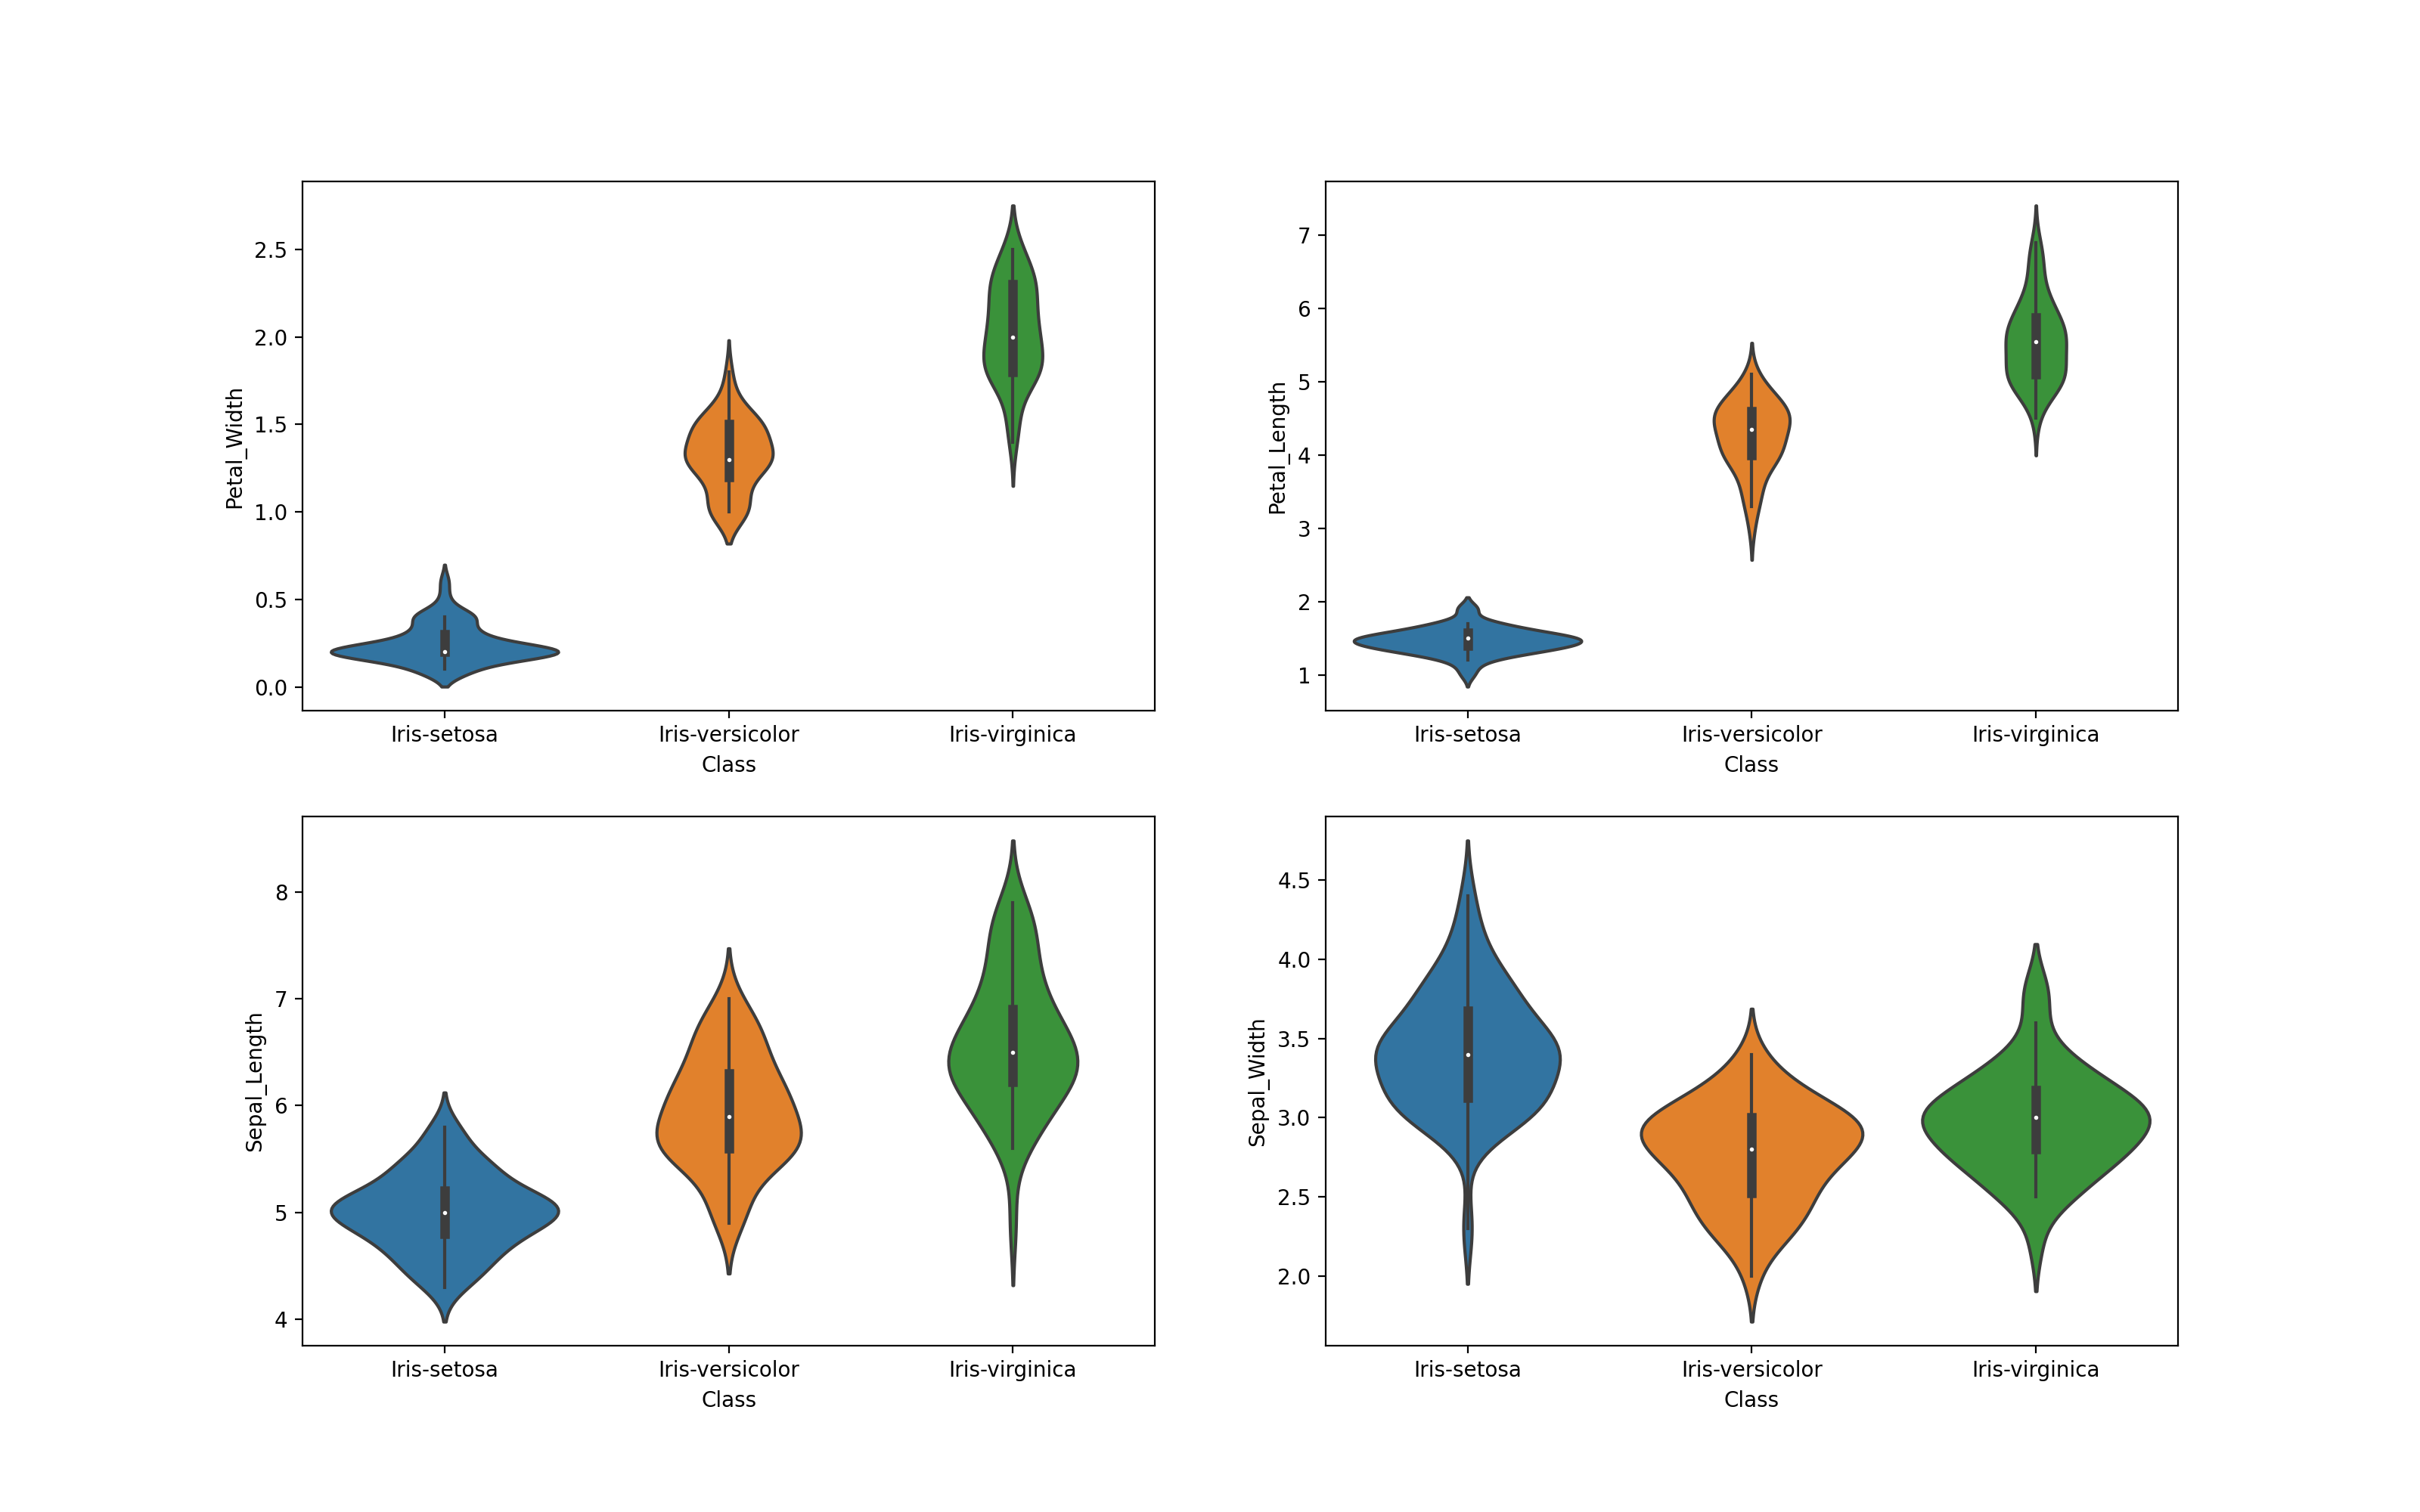

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot( y='Petal_Width', x= 'Class', data=iris_data,  ax=axes[0, 0])
sns.violinplot( y='Petal_Length', x= 'Class', data=iris_data, ax=axes[0, 1])
sns.violinplot( y='Sepal_Length', x= 'Class', data=iris_data,  ax=axes[1, 0])
sns.violinplot( y='Sepal_Width', x= 'Class', data=iris_data, ax=axes[1, 1])
plt.show()


The above violin chart shows that the setosa has less disturbution and has less density when it comes to petal width and petal length. The chart also shows that Versicolor is distributed in a average manner and average features in case of petal length & width While Virginica is highly distributed with large no .of values and features in case of sepal length & width. In terms of median and mean Setosa has highest density at 5.0 cm ( sepal length feature) which is also the median value(5.0)

In [19]:
iris_data.groupby('Class').agg(['mean', 'median'])

Sepal_Length        Sepal_Width        Petal_Length         \
                        mean median        mean median         mean median   
Class                                                                        
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                Petal_Width         
                       mean median  
Class                               
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

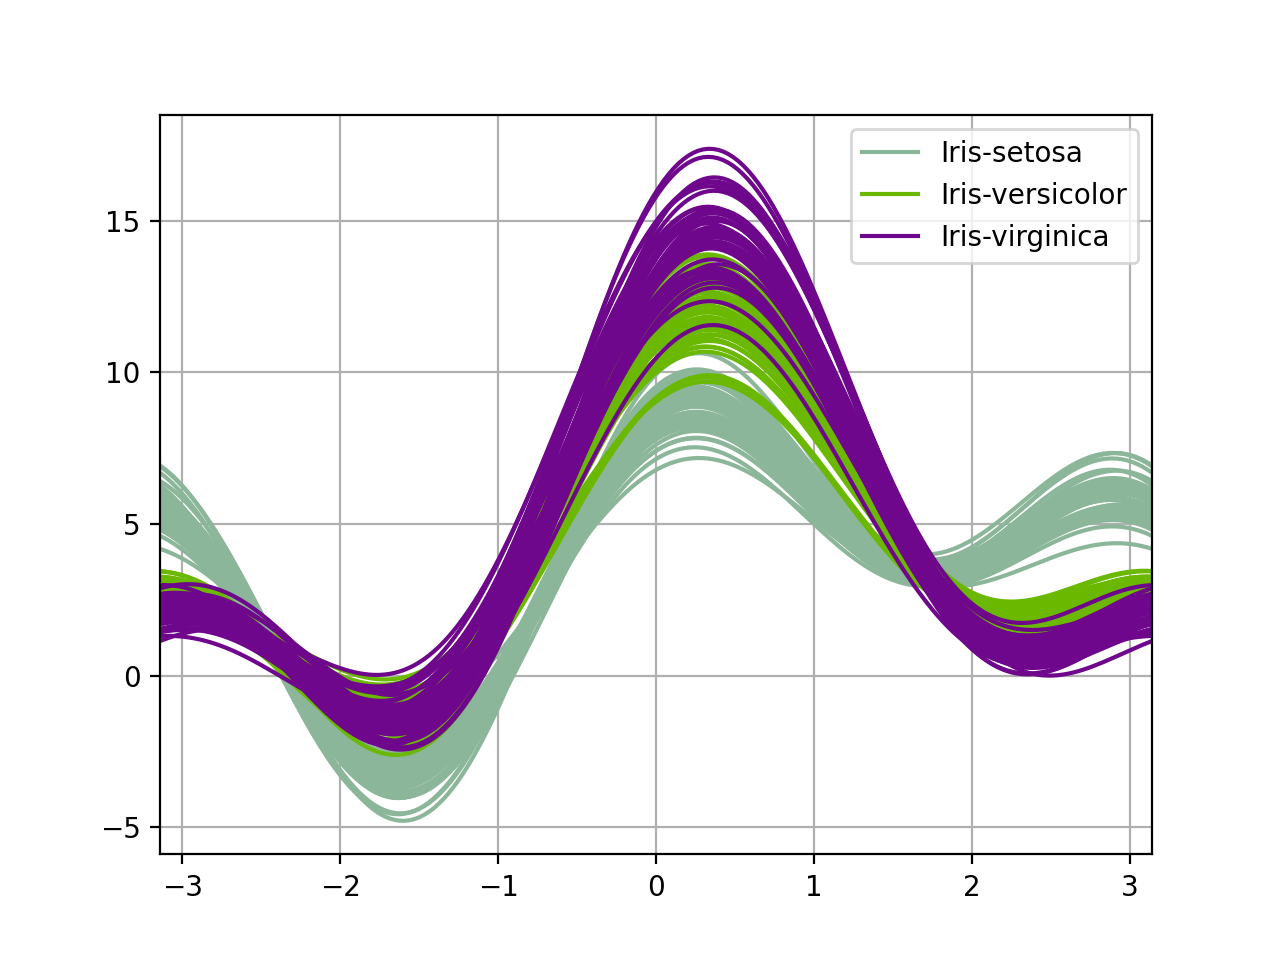

In [20]:
x = pd.plotting.andrews_curves(iris_data, 'Class')
 
# plotting the Curve
x.plot()
 
# Display
plt.show()

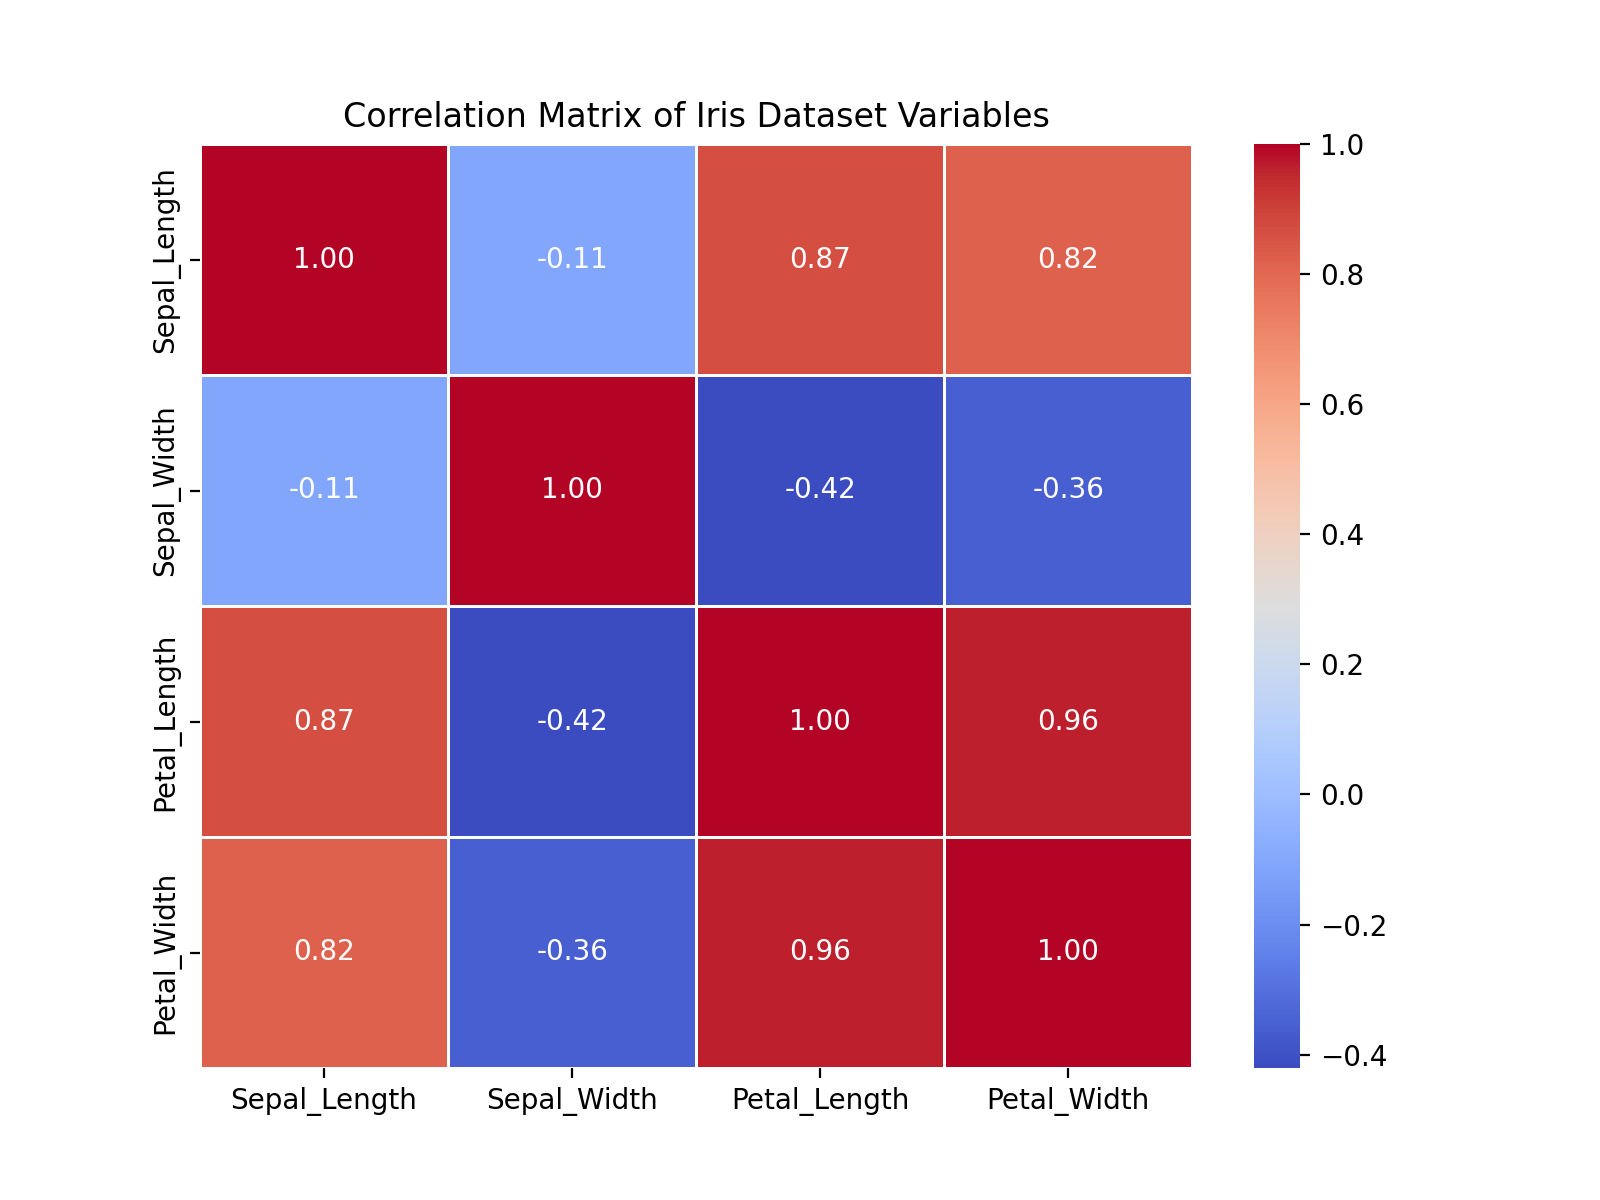

In [21]:
correlation_matrix = iris_data.drop('Class', axis=1).corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset Variables')
plt.show()

Correlation matrix for Iris-setosa Class:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0.356544
Petal_Length      0.871754    -0.420516      1.000000     0.962757
Petal_Width       0.817954    -0.356544      0.962757     1.000000


Correlation matrix for Iris-versicolor Class:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0.356544
Petal_Length      0.871754    -0.420516      1.000000     0.962757
Petal_Width       0.817954    -0.356544      0.962757     1.000000


Correlation matrix for Iris-virginica Class:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0

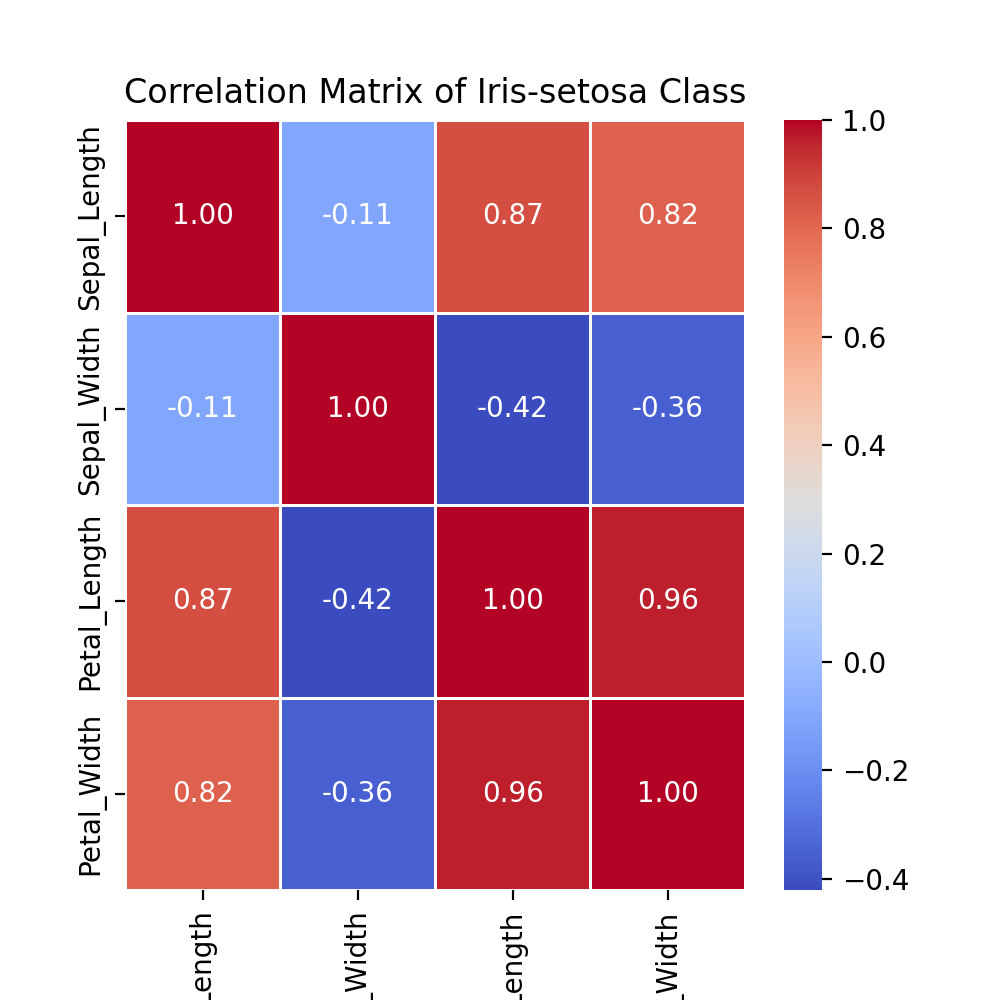

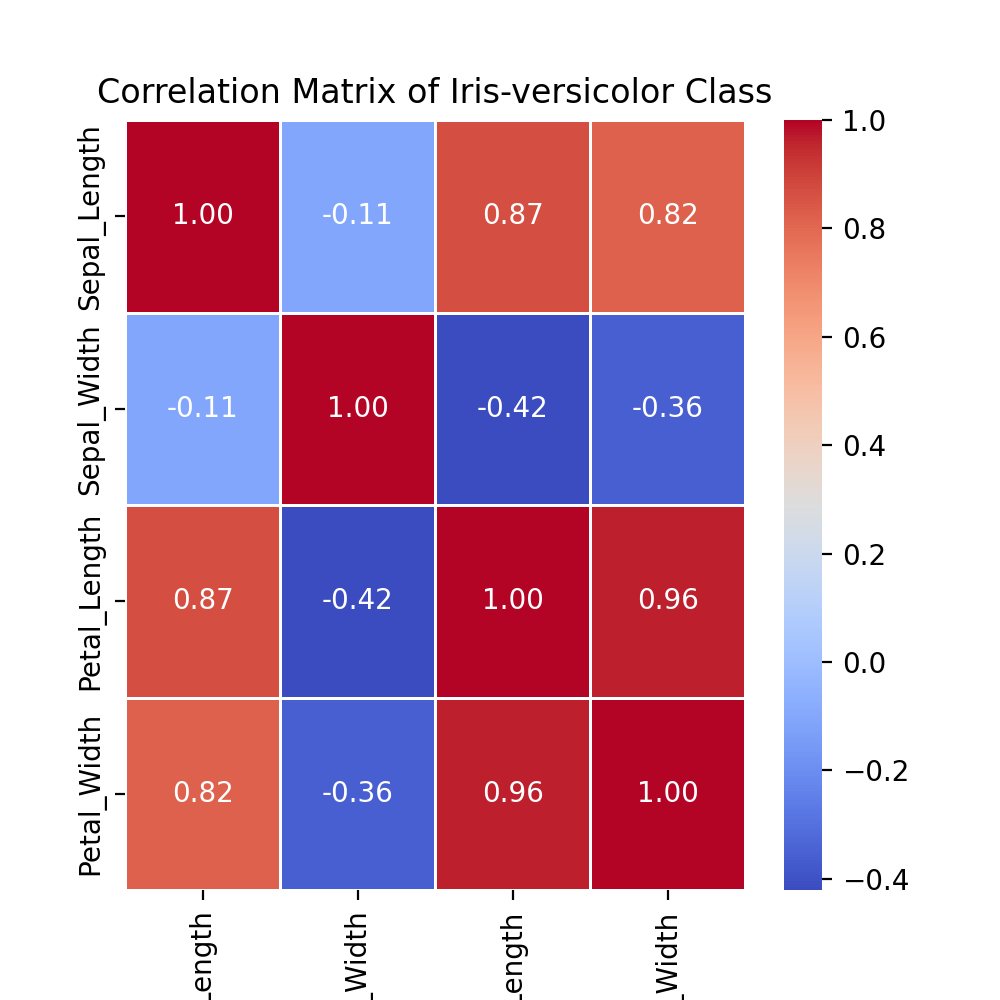

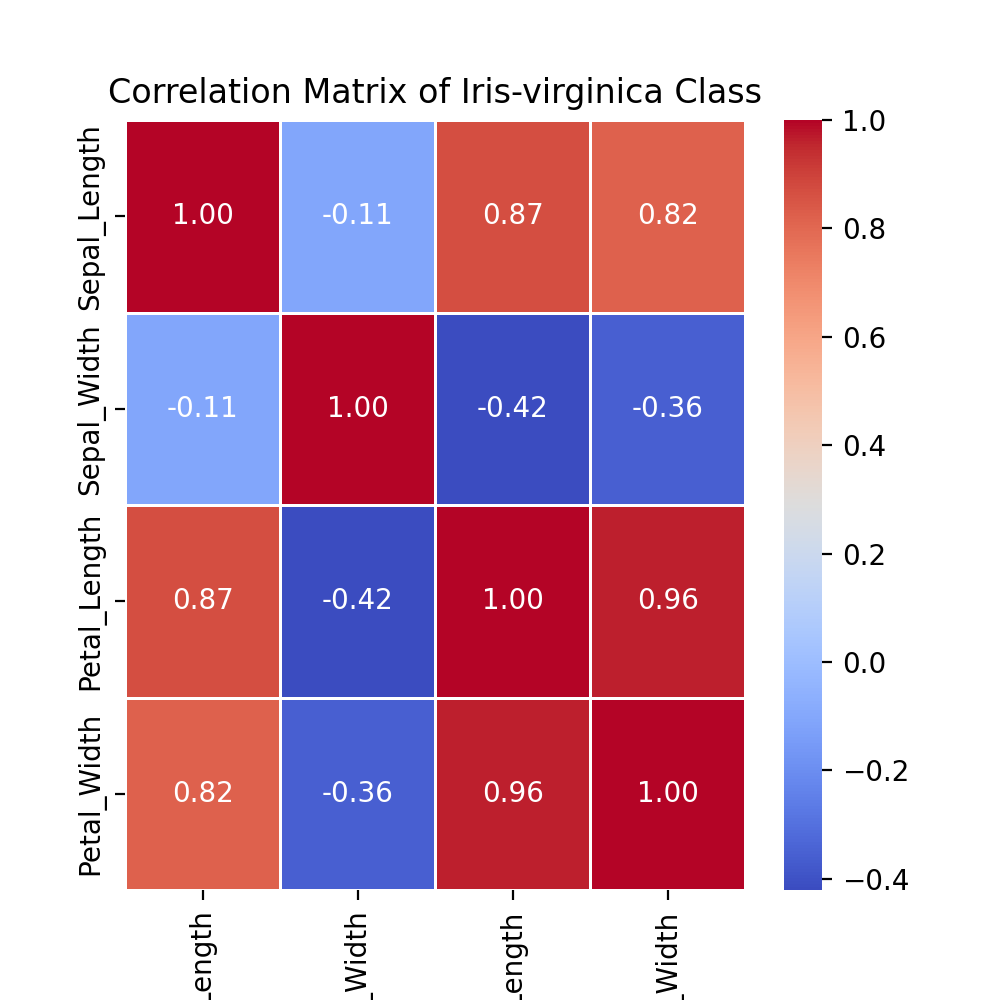

In [22]:
Class_list = iris_data['Class'].unique()

for Class in Class_list:
    species_data = iris_data[iris_data['Class'] == Class]
    correlation_matrix = iris_data.drop('Class', axis=1).corr()
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix of {Class} Class')
    print(f"Correlation matrix for {Class} Class:")
    print(correlation_matrix)
    print("\n")

# Kolmogorov-Smirnov test
In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). It is named after Andrey Kolmogorov and Nikolai Smirnov.

In [23]:
import warnings
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", 
                  "exponweib",
                  "pareto", 
                  "weibull_max", 
                  "weibull_min",
                  "skewnorm",
                  "norminvgauss",
                  "powernorm",
                  "uniform"]
    
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    print(" ")
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [24]:
get_best_distribution(iris_data['Sepal_Length'])

p value for norm = 0.17058360931631134
p value for exponweib = 0.6126031950328066
p value for pareto = 9.751273391034225e-07
p value for weibull_max = 0.19231417373977677
p value for weibull_min = 0.33031060008714297
p value for skewnorm = 0.27425394855160246
p value for norminvgauss = 0.22739840681075496
p value for powernorm = 0.4693994569616412
p value for uniform = 9.80536604589249e-06
 
Best fitting distribution: exponweib
Best p value: 0.6126031950328066
Parameters for the best fit: (0.4337242019690208, 3.3623227023842674, 4.277000529224933, 2.3706075854333646)


In [25]:
get_best_distribution(iris_data['Sepal_Width'])

p value for norm = 0.07694369991172811
p value for exponweib = 0.15743506859729794
p value for pareto = 1.2473465137660868e-14
p value for weibull_max = 0.00439117946246409
p value for weibull_min = 0.1880294244094366
p value for skewnorm = 0.1564693229971612
p value for norminvgauss = 0.16378569787000874
p value for powernorm = 0.18163615832125823
p value for uniform = 3.3500975388397754e-09
 
Best fitting distribution: weibull_min
Best p value: 0.1880294244094366
Parameters for the best fit: (2.923672048906546, 1.8751849703424837, 1.3197012033829534)


In [26]:
get_best_distribution(iris_data['Petal_Length'])

p value for norm = 1.0900352050591725e-05
p value for exponweib = 1.9961069503405117e-05
p value for pareto = 1.0534664933534886e-09
p value for weibull_max = 1.3227648233272568e-32
p value for weibull_min = 7.881511385064802e-06
p value for skewnorm = 4.1266461801422576e-05
p value for norminvgauss = 3.210508807003979e-05
p value for powernorm = 1.4345434771054866e-05
p value for uniform = 8.297565118231696e-06
 
Best fitting distribution: skewnorm
Best p value: 4.1266461801422576e-05
Parameters for the best fit: (-5.107779132095215, 6.051839133386611, 2.889820194287351)


In [27]:
get_best_distribution(iris_data['Petal_Width'])

p value for norm = 0.00021077837225543208


c:\Users\keith\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:2008: RuntimeWarning: invalid value encountered in add


p value for exponweib = 3.896787003655591e-09
p value for pareto = 1.2858439257225887e-07
p value for weibull_max = 0.0003562864559913083
p value for weibull_min = 6.004195020761946e-07
p value for skewnorm = 0.00020933846509450145
p value for norminvgauss = 0.0003295380559815817
p value for powernorm = 0.00012112431230936792
p value for uniform = 1.7967618271180075e-05
 
Best fitting distribution: weibull_max
Best p value: 0.0003562864559913083
Parameters for the best fit: (2.0375096450719985, 2.6761524773697083, 1.6677184425077458)


 # Simple Linear Regression
Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results.


In [28]:
z = iris_data['Sepal_Length']

x = z.values.reshape(-1,1)
x.shape

(150, 1)

In [29]:
y = iris_data['Sepal_Width']
y.shape

(150,)

In [30]:
model = LinearRegression()
results = model.fit(x, y)
print('b0, y-intercept:', results.intercept_) # The y-intercept indicates the location where it cross an y axis
print('b1, slope:', results.coef_) # The slope indicates the steepness of a line

b0, y-intercept: 3.3886373794881
b1, slope: [-0.05726823]


In [31]:
R_sqr = results.score(x, y)
print (f'R square is equal: {R_sqr}')

R square is equal: 0.011961632834767588


In [32]:
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:            Sepal_Width   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.792
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.183
Time:                        20:41:14   Log-Likelihood:                -86.090
No. Observations:                 150   AIC:                             176.2
Df Residuals:                     148   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3886      0.252     13.421      0.0